# Fiche TP3 : Training a CNN From Scratch

## 01- Load the cifar-10 dataset and perform pre-processing: data normalization and data augmentation.

In [165]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

In [166]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [167]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [168]:
print('Train Images Shape:      ', x_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', x_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (40000, 32, 32, 3)
Train Labels Shape:       (40000, 1)

Validation Images Shape:  (10000, 32, 32, 3)
Validation Labels Shape:  (10000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


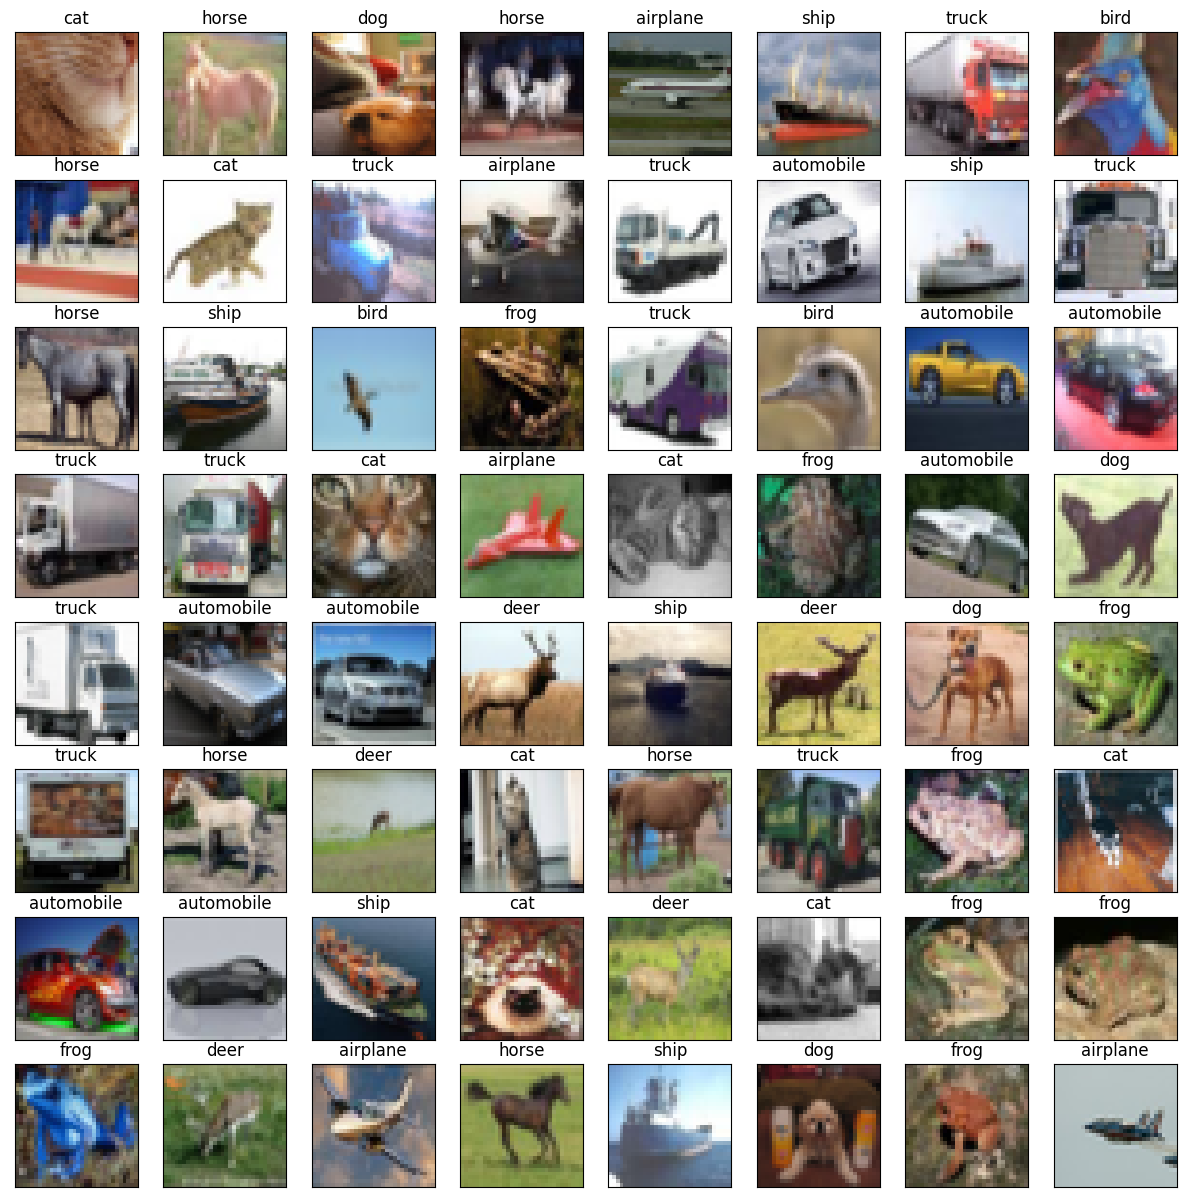

In [169]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

Data normalization

In [170]:
# Convert pixel values data type to float32
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_valid = x_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(x_train)
std  = np.std(x_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean) /(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)

In [171]:
x_train.shape

(40000, 32, 32, 3)

One hot encoding the labels

In [172]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

In [173]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Data augmentation

In [174]:
# Data augmentation
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    
    # Randomly flip images horizontally
    horizontal_flip=True,
    
    # Zoom images in by up to 10%
    zoom_range=0.1,
    
    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    
    # Channel shift intensity
    channel_shift_range=0.1,
)

In [175]:
x_train.shape[1:]

(32, 32, 3)

# 02-Create a convolutional neural network via Keras with the following layers

###### o Input of (32, 32, 3) 
###### o Conv2D, 16 kernels, kernel size = 3, valid padding, ReLu actvation 
###### o Conv2D, 16 kernels, kernel size = 3, valid padding, ReLu actvation 
###### o Maxpooling kernel size = 2*2 
###### o Conv2D, 32 kernels, kernel size = 3, valid padding, ReLu actvation 
###### o Conv2D, 32 kernels, kernel size = 3, valid padding, ReLu actvation 
###### o Maxpooling kernel size = 2*2 
###### o Flatten 
###### o Dense, 10 neurons, softmax activation

In [176]:
import tensorflow as tf
tf.random.set_seed(1234) 
def model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu',input_shape=x_train.shape[1:]))
    model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'))   
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    return model

In [177]:
model=model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_69 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 conv2d_71 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                               

# 03 -Fit the neural network for the training data.

###### o use Adam optimizer with its default settings 
###### o use batch size of 64 
###### o use accuracy as a metric 
###### o use categorical_crossentropy loss 
###### o print the metric after each epoch for both the train and the test set! 
###### o train the neural network for 5 epochs

In [178]:
epochs = 5
batch_size=64

In [179]:
model.compile(optimizer=Adam(), 
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [180]:
history=model.fit(data_generator.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(x_valid, y_valid))

Epoch 1/5


/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 [==============================] - 118s 185ms/step - loss: 1.6917 - accuracy: 0.3839 - val_loss: 1.3795 - val_accuracy: 0.5121
Epoch 2/5
625/625 [==============================] - 116s 185ms/step - loss: 1.4139 - accuracy: 0.4943 - val_loss: 1.2511 - val_accuracy: 0.5565
Epoch 3/5
625/625 [==============================] - 128s 204ms/step - loss: 1.2901 - accuracy: 0.5423 - val_loss: 1.1583 - val_accuracy: 0.5955
Epoch 4/5
625/625 [==============================] - 126s 202ms/step - loss: 1.2068 - accuracy: 0.5731 - val_loss: 1.0319 - val_accuracy: 0.6347
Epoch 5/5
625/625 [==============================] - 134s 214ms/step - loss: 1.1457 - accuracy: 0.5979 - val_loss: 1.1194 - val_accuracy: 0.6219


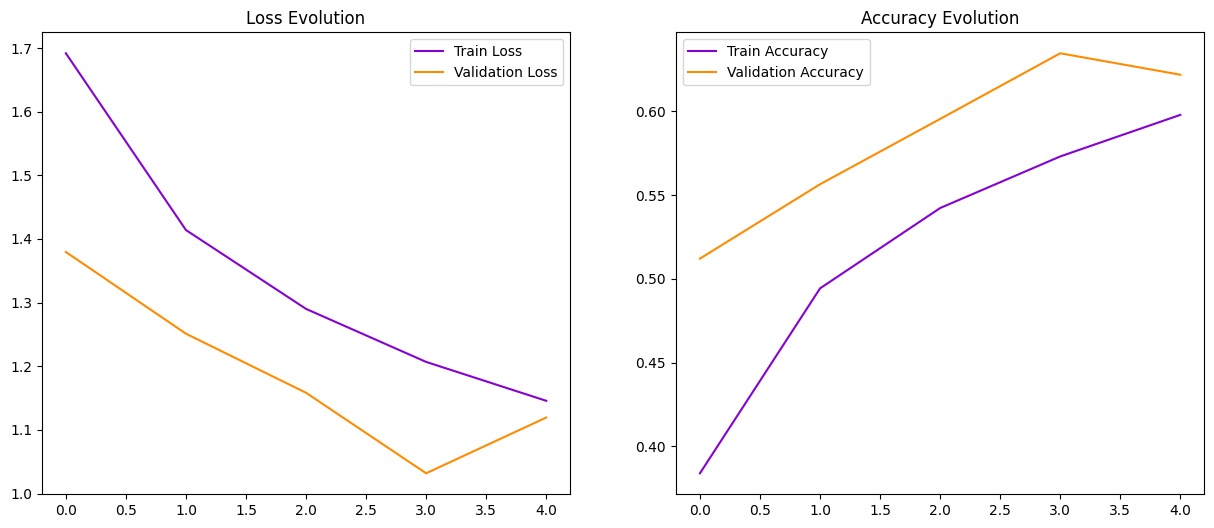

In [181]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [182]:


# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



313/313 [==============================] - 5s 17ms/step - loss: 1.1429 - accuracy: 0.6109

Test Accuracy: 0.6108999848365784
Test Loss:     1.1429363489151


In [183]:
from keras.utils import plot_model

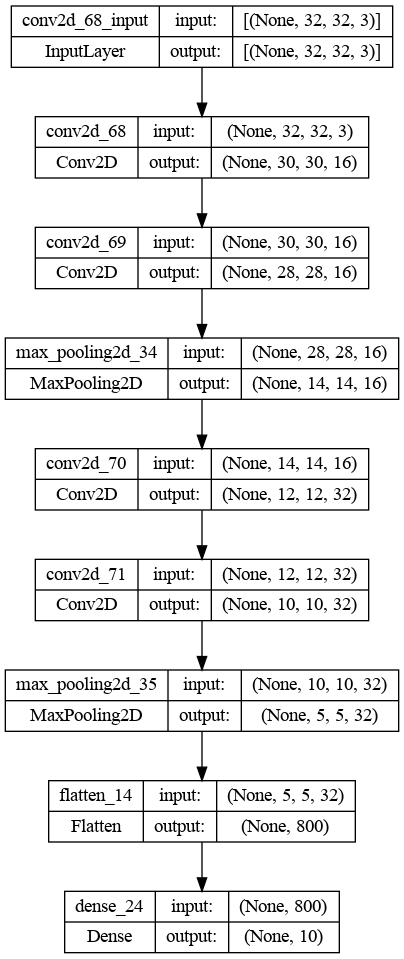

In [184]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

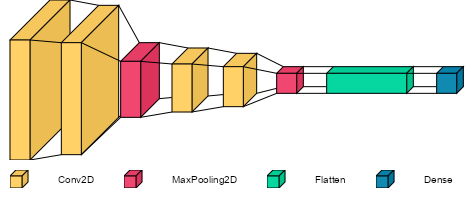

In [185]:
import visualkeras
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 10)
visualkeras.layered_view(model, legend=True, font=font,spacing=30) # selected font

# 4. Improving CNN: try to fit another convolutional neural network that can achieve 70% accuracy on the test set (with only 5 epochs).

In [186]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

In [187]:
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_60 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_61 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

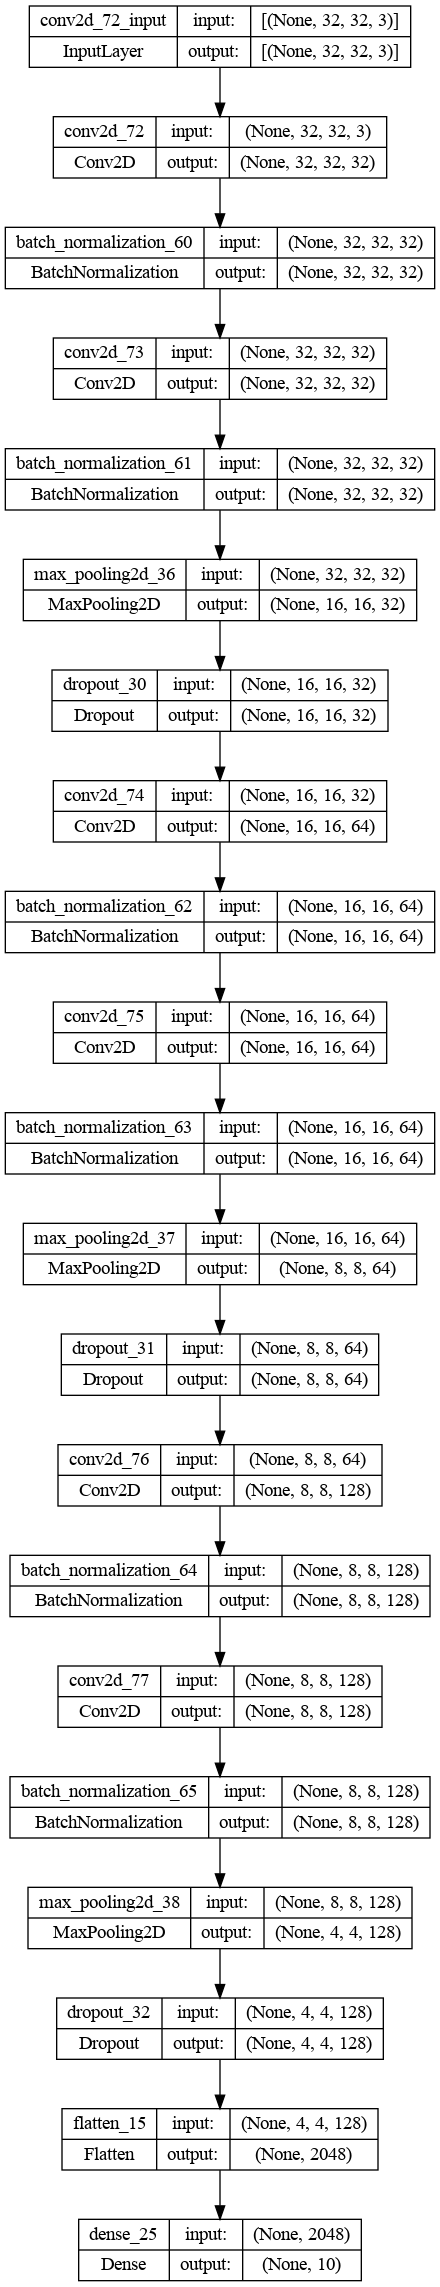

In [188]:
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

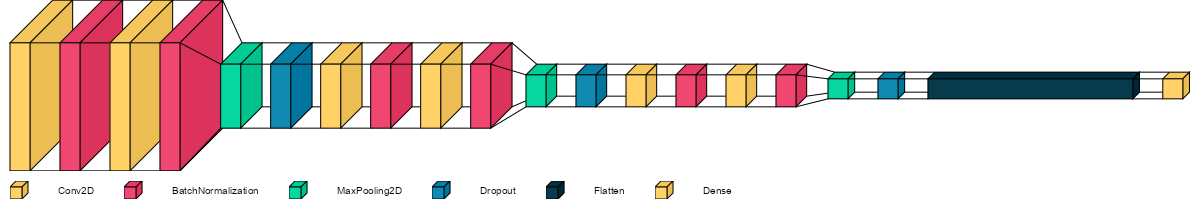

In [189]:
visualkeras.layered_view(model1, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 10)
visualkeras.layered_view(model1, legend=True, font=font,spacing=30) # selected font

In [190]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tf.random.set_seed(1234) 
model1.fit(data_generator.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(x_valid, y_valid))

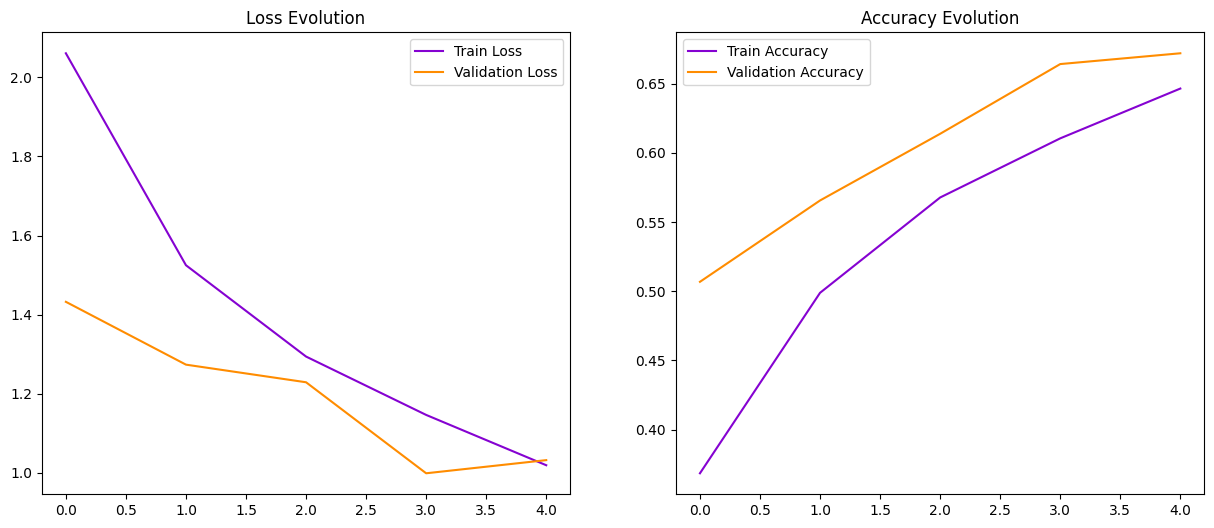

In [192]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model1.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model1.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model1.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model1.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

In [194]:
weight_decay=0.0001

In [195]:
tf.random.set_seed(1234) 
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=x_train.shape[1:], kernel_regularizer=l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))


model_2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))   
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model_2.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))   
model_2.add(BatchNormalization())
model_2.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.4))

model_2.add(Flatten())
model_2.add(Dense(512,activation='relu',kernel_regularizer=l2(weight_decay)))
model1.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax')) 

In [196]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_66 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_79 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_67 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

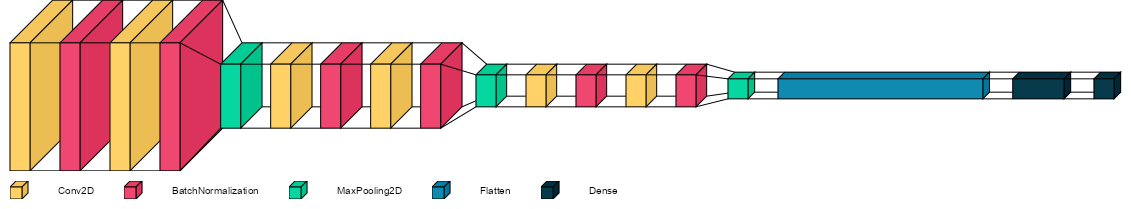

In [197]:
visualkeras.layered_view(model_2, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 10)
visualkeras.layered_view(model_2, legend=True, font=font,spacing=30) # selected font

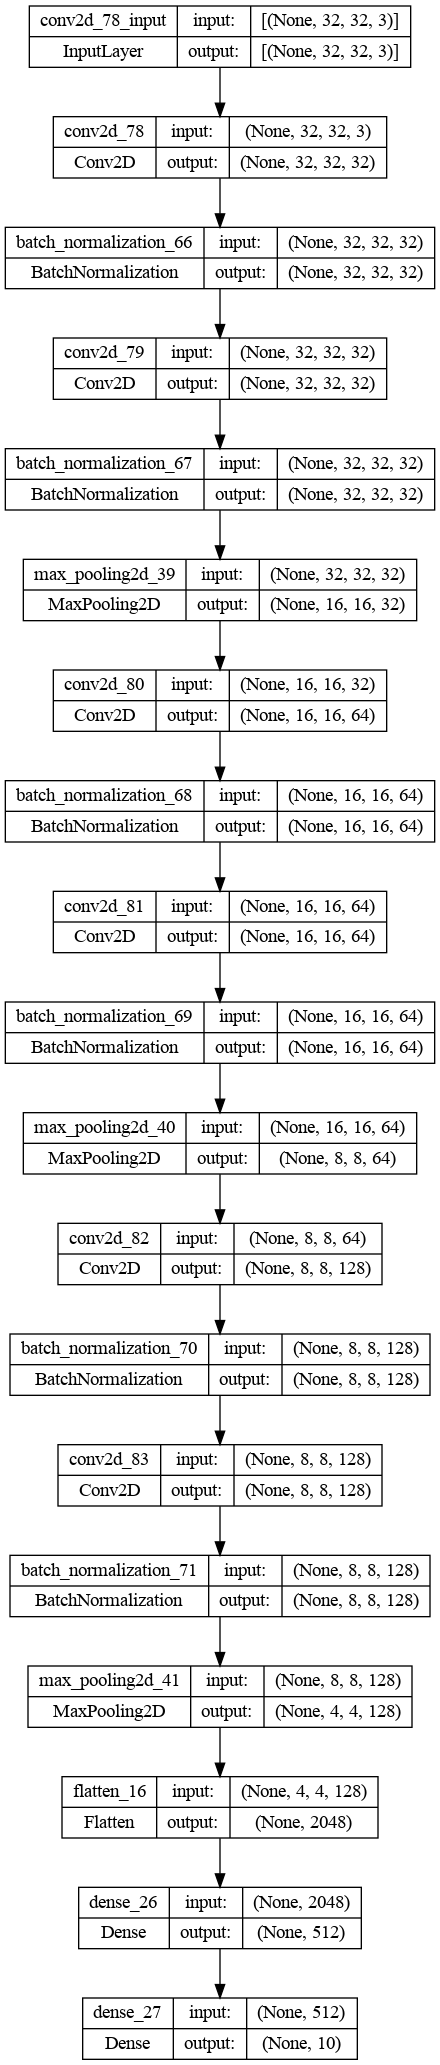

In [198]:
plot_model(model_2, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [199]:
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [200]:
tf.random.set_seed(1234) 
model_2.fit(data_generator.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          batch_size=128,
          validation_data=(x_valid, y_valid),
          shuffle=True)

Epoch 1/5
625/625 [==============================] - 332s 524ms/step - loss: 1.5942 - accuracy: 0.4756 - val_loss: 1.2171 - val_accuracy: 0.6055
Epoch 2/5
625/625 [==============================] - 339s 542ms/step - loss: 1.1809 - accuracy: 0.6232 - val_loss: 1.0647 - val_accuracy: 0.6721
Epoch 3/5
625/625 [==============================] - 328s 525ms/step - loss: 1.0328 - accuracy: 0.6784 - val_loss: 0.9167 - val_accuracy: 0.7280
Epoch 4/5
625/625 [==============================] - 326s 521ms/step - loss: 0.9329 - accuracy: 0.7169 - val_loss: 0.9816 - val_accuracy: 0.7178
Epoch 5/5
625/625 [==============================] - 379s 606ms/step - loss: 0.8709 - accuracy: 0.7438 - val_loss: 0.8210 - val_accuracy: 0.7678


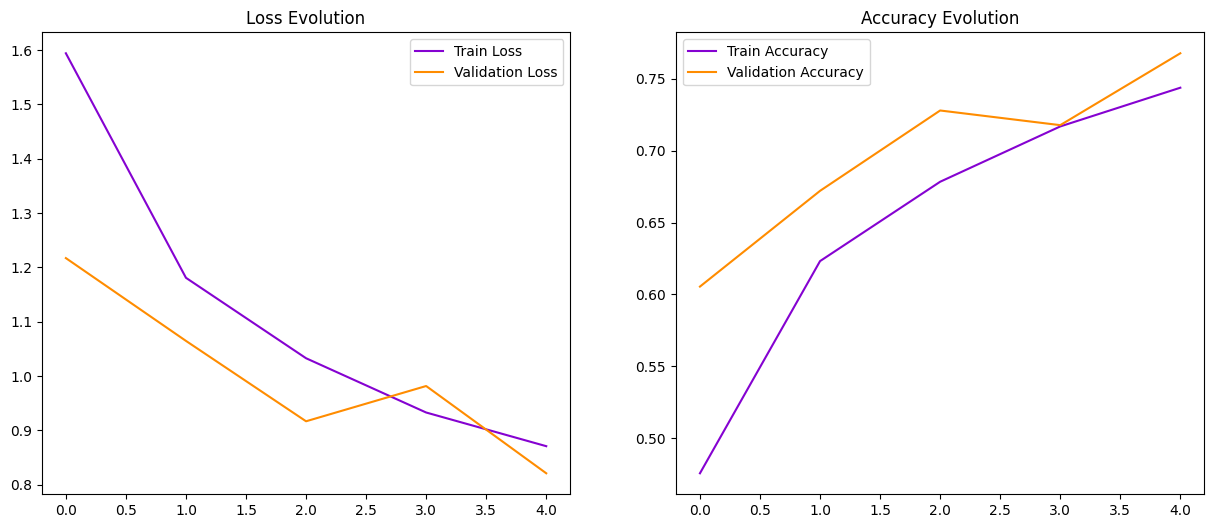

In [201]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model_2.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model_2.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_2.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model_2.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [202]:
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 [==============================] - 16s 50ms/step - loss: 0.8190 - accuracy: 0.7693

Test Accuracy: 0.7692999839782715
Test Loss:     0.8189650177955627
